In [1]:
#!git clone https://github.com/ALjone/INF368-Final-Project
import os
import pandas as pd

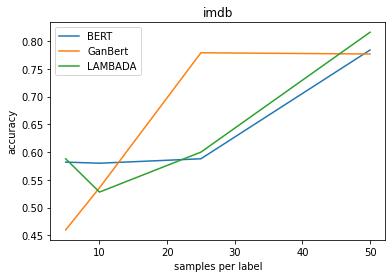

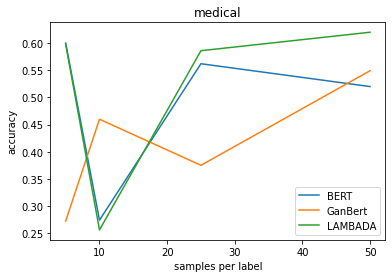

In [2]:
directory = '../results/'

#Loop through each folder in the results folder, equivalent to each dataset
for _, folders, _ in os.walk(directory):
    for folder in folders:
        if '.ipynb_checkpoints' in folder:
            continue
        #Read all the results for each folder
        bert = pd.read_csv(directory+folder+"/bert_results.csv")
        lambada = pd.read_csv(directory+folder+"/LAMBADA_results.csv")
        GanBert = pd.read_csv(directory+folder+"/GanBert_results.csv")
        #Format the data in way that makes more sense
        df = pd.DataFrame(columns=["num_per_sample", "BERT", "GanBert", "LAMBADA"])
        for i, num_per_sample in enumerate([5, 10, 25, 50]):
            row = {"num_per_sample": num_per_sample, "BERT": bert.iloc[i, 1], "GanBert":GanBert.iloc[i, 1], "LAMBADA":lambada.iloc[i, 1]}
            df = df.append(row, ignore_index = True)

        #Save the results
        df.to_csv(directory+folder+"/full_result.csv")

        #Make a plot and save it 
        ax = df.plot(x="num_per_sample", xlabel="samples per label", ylabel = "accuracy", title=folder)
  
        fig = ax.get_figure()
        
        
        #Check that the folder exists
        if not os.path.exists('../images'):
          os.mkdir('../images')
        #We assume the folder name is the same as the one for the dataset
        fig.savefig('../images/'+folder+".png")